In [685]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [686]:
'''Plots the green function G(x, x')
using the eigenfunction method and the patching method
'''

#Parameters: 
x_prime = 5/4
x_a, x_b = 1, 2
max_n = 100

Greens function for eigenfunction method

In [687]:
# Eigenfunction method
def lambda_n(n):
  lambda_i = ((n * np.pi)/(np.log(2)))**2
  return lambda_i

xs = np.linspace(x_a, x_b, 1000)
G_sum = 0
Gs = np.zeros_like(xs)
ln2 = np.log(2)
for n in range(1, max_n):
  lambdaa = lambda_n(n)
  G_n = -(2/(lambdaa*ln2))*np.sin((n*np.pi/ln2)*np.log(x_prime))*np.sin((n*np.pi/ln2)*np.log(xs))
  Gs += G_n

Greens function for patching method

In [688]:
#Patching Method
xs_L = np.linspace(x_a, x_prime, 1000)
xs_R = np.linspace(x_prime, x_b, 1000)

a_L = ((x_prime - 3)*np.log(3-x_prime))/(((x_prime*np.log(x_prime)) + (3-x_prime)*np.log(3-x_prime)*x_prime))
a_R = ((x_prime - 3)*np.log(x_prime))/(((x_prime*np.log(x_prime)) + (3-x_prime)*np.log(3-x_prime)*x_prime))
Gs_L = a_L * np.log(xs_L)
Gs_R = a_R * np.log(3 - xs_R)




Plot to compare greens functions 

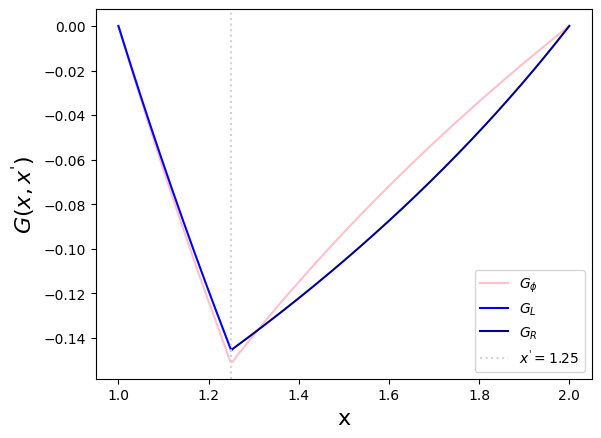

In [689]:
plt.plot(xs, Gs, color = "pink", label = rf"$G_\phi$")
plt.plot(xs_L, Gs_L, color = "blue", label = rf"$G_L$")
plt.plot(xs_R, Gs_R, color = "darkblue", label = rf"$G_R$")

plt.ylabel(rf"$G(x, x^')$", fontsize = 16)
plt.xlabel("x", fontsize = 16)
plt.axvline(x_prime, label = rf"$x^' = ${x_prime}", linestyle = "dotted", color = "lightgrey")
plt.legend()

Solution to equation

In [690]:
#plot eigen solution F(x) = 1
xs = np.linspace(x_a, x_b, 1000)
u_sum = 0
for n in range(1, 30):
  lambdaa = lambda_n(n)
  integral = ((ln2)*(np.pi*n -2*np.pi*n*np.cos(n*np.pi) + np.log(4)*np.sin(np.pi*n)))/(((n*np.pi)**2) + (ln2**2))
  u_n = -(2/(lambdaa*ln2))*np.sin((n*np.pi/ln2)*np.log(xs))*integral
  u_sum += u_n

In [726]:
#plot patching solution
from sympy import symbols, integrate, log, lambdify

#wolfram couldnt integrate, using symbolab
xs_L = np.linspace(x_a, x_prime, 1000)
xs_R = np.linspace(x_prime, x_b, 1000)


from sympy import symbols, integrate, log, lambdify
#Left of Greens
# y, a = symbols("y a") #y is x_prime
# F = ((y*log(y) + (3-y)*log(3-y))*y)
# gl = (((y-3)*log(3-y))*F)/((y*log(y) + (3-y)*log(3-y))*y) 
# gl = ((y-3)*log(3-y))
# integral_gl = integrate(gl, (y, 1, a))
# uLs_func= integral_gl * log(a)
# uLs_soln = lambdify(a, uLs_func, modules='numpy')
# xs_L = np.linspace(x_a, x_prime-0.01, 1000)
# uLs = uLs_soln(xs_L)

def Gx_Fx(y):
  G = (1/4)*((2*(((y-3)**2))*log(3-y))-((y-6)*y))
  return G


Gx_FxL = Gx_Fx(xs_L)
#Gx_FxR = Gx_Fx(xs_R)
uL = np.log(xs_L) * Gx_FxL
uR = np.log(xs_R-3) *Gx_FxR


plt.plot(xs_L, uL)
plt.xlabel('xs_L')
plt.ylabel('uL')
plt.title('Plot of uL against xs_L')
plt.grid(True)
plt.show()


AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'

In [740]:
from scipy.integrate import solve_bvp

def Forcing(xs):
  return xs

def solver(xs, G_init): 
  G1, G2 = G_init
  a = xs**2
  b = xs
  c = 0
  d = Forcing(xs)

  dG = G2
  d2G = (d - b * G2 - c * G1) / a
  return np.array([dG, d2G])

def bcs(Ga, Gb):
    return np.array([Ga[0], Gb[0]])

G_init = np.zeros((2, xs.size))
u_analytical = solve_bvp(solver, bcs, xs, G_init)

u_plot = u_analytical.sol(xs)[0] # only plot u 

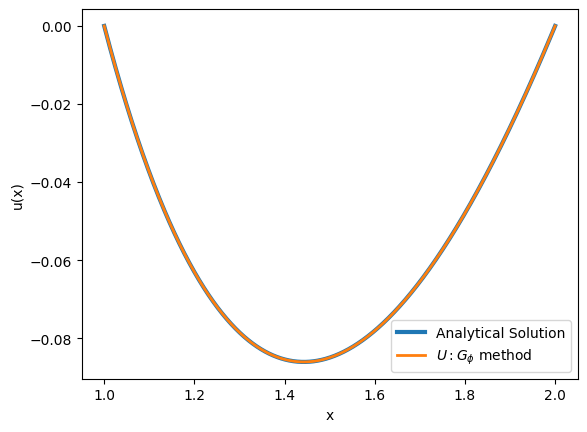

In [739]:
# Plotting u 

#eigensolution
plt.plot(xs, u_plot, label = rf"Analytical Solution", linewidth = 3)
plt.plot(xs, u_sum, label = rf"$U: G_\phi$ method", linewidth = 2)
#patching 

#labeling
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()